# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [40]:
medical.shape

(1338, 8)

In [41]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

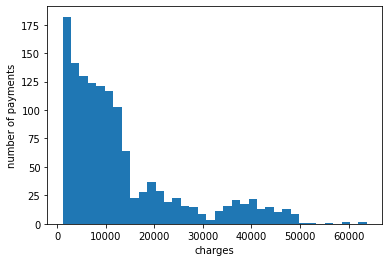

In [42]:
_=plt.hist(medical.charges, bins=int(np.sqrt(len(medical.charges))))
_=plt.xlabel('charges')
_=plt.ylabel('number of payments')
plt.show()

In [43]:
print('The mean of the charges is {:.2f}'.format(np.mean(medical.charges)))
print('The standard deviation of the charges is {:.2f}'.format(np.std(medical.charges, ddof=1)))

The mean of the charges is 13270.42
The standard deviation of the charges is 12110.01


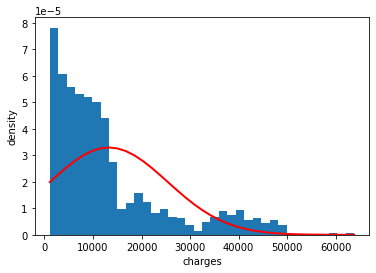

In [44]:
count, bins, ignored=plt.hist(medical.charges, bins=int(np.sqrt(len(medical.charges))), density=True)
mu=np.mean(medical.charges)
sigma=np.std(medical.charges)
_=plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),
         linewidth=2, color='r')
_=plt.xlabel('charges')
_=plt.ylabel('density')
plt.show()

The distribution of the charge sample is highly non-normal, therefore the normal distribution with mean and standard deviation does not well reflect the distribution of the population. There are significant amount of payments that are higher than the mean and twice of standard deviation (37481), and there are outliers lying beyond the mean and three times of standard deviation (49587). 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Because we don't know what is underlying distribution of the whole population is, or the standard deviation of the population, but the sample size (1338) is much more than 30, we should use central limited theorem to obtain a normal distribution, and perform t-distribution frequentist test, to calculate the confidence interval for the actual average charge of the whole population.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Because the administrator only concerns about the possibility that actual average charge is lower than 12,000, we are going to use one-sided confidence interval in this case.

We randomly take 50 samples from the 1338 samples for many times and calculate their mean. When the sampling time increases, according to the central limit theorem, the mean distribution will approach a normal distribution. The mean value of the sampling mean is going to be close to the estimated population mean, and the standard deviation of the sampling distribution of the mean is going to be clost to the estimated standard deviation of the population devided by square root of sample size.

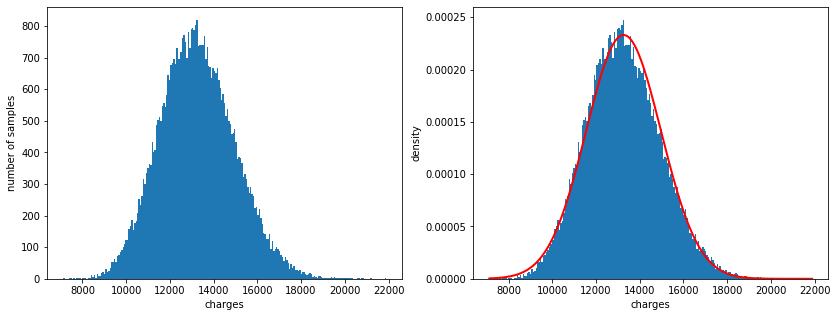

In [45]:
seed(47)
samples_50_mean=[]
for _ in range(50000):
    samples_50_mean.append(np.mean(np.random.choice(medical.charges, 50)))
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(14, 5))
_=ax1.hist(samples_50_mean, bins=int(np.sqrt(len(samples_50_mean))))
_=ax1.set_xlabel('charges')
_=ax1.set_ylabel('number of samples')
count, bins, ignored=ax2.hist(samples_50_mean, bins=int(np.sqrt(len(samples_50_mean))), density=True)
mu=np.mean(samples_50_mean)
sigma=np.std(samples_50_mean)
_=ax2.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),
         linewidth=2, color='r')
_=ax2.set_xlabel('charges')
_=ax2.set_ylabel('density')
plt.show()

It seems that the distribution of the mean values of 50 samples randomly selected from the sample set containing 1338 records fits the normal distribution well. We are going to use the mean value of the sampling distribution as the estimated population mean, and use t-distribution to determine the confidence interval of the population mean.

In [46]:
estimated_population_mean=np.mean(samples_50_mean)
print('The estimated population mean is {:.2f}'.format(estimated_population_mean))
estimated_population_standard_deviation=np.std(samples_50_mean)*np.sqrt(50)
print('The estimated population standard deviation is {:.2f}'.format(estimated_population_standard_deviation))
degrees_of_freedom=50-1
alpha_level=(1-0.95) # One-sided interval
t_distribution=t.ppf(alpha_level, degrees_of_freedom)*(-1)
print('The t-distribution value is {:.2f}'.format(t_distribution))
s_devide_sqrt_n=estimated_population_standard_deviation/np.sqrt(50)
error=t_distribution*s_devide_sqrt_n
print('The 95% one-sided confidence interval of the mean using t-distribution is >= {:.2f}'.format(
    estimated_population_mean-error))
print('The p-value on the null hypothesis of charge < 12,000 is {:.2f}'.format(
    scipy.stats.norm.cdf(12000, estimated_population_mean, np.std(samples_50_mean))))

The estimated population mean is 13261.85
The estimated population standard deviation is 12104.20
The t-distribution value is 1.68
The 95% one-sided confidence interval of the mean using t-distribution is >= 10391.94
The p-value on the null hypothesis of charge < 12,000 is 0.23


The 95% confidence interval for the actual average of the charge is >= 10391.94, which is lower than 12000. It means the hypothesis of charge < 12000 cannot be rejected, and it is possible that the actual average of the charge can be lower than 12000. The adminstrator should be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ We assume that the population variances of the two groups are equal. If this assumption is met, we can use pooled estimated standard error for t-test calculation. If the assumption fails, we have to perform Welch's Test. 

Other assumptions include: random samples, independent observations, and normal distributions of each group.

The null hypothesis is the population mean of one group equals the population mean of the other group; and the alternative hypothesis is the population mean of one group is greater than the population mean of the other group.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Manual approach:

In [47]:
insured=medical[medical['insuranceclaim']==1]['charges']
uninsured=medical[medical['insuranceclaim']==0]['charges']
print('{} payments have insurance claims, and {} payments have not'.format(insured.shape[0], uninsured.shape[0]))

783 payments have insurance claims, and 555 payments have not


In [58]:
n0=len(insured)
s0=np.std(insured)
n1=len(uninsured)
s1=np.std(uninsured)
x0=np.mean(insured)
x1=np.mean(uninsured)
sp=np.sqrt(((n0-1)*s0**2+(n1-1)*s1**2)/(n0+n1-2))
t_test=(x0-x1)/sp/np.sqrt(1/n0+1/n1)
print('The t-test statistic value is {:.2f}, and p-value is {:.2e}'.format(t_test, 1-t.cdf(t_test, n0+n1-2)))


The t-test statistic value is 11.90, and p-value is 0.00e+00


scipy.stats approach:

In [59]:
t_test_scipy, p_value_scipy=scipy.stats.ttest_ind(insured, uninsured)
print('The t-test statistic value is {:.2f}, and p-value is {:.2e}'.format(t_test_scipy, p_value_scipy))

The t-test statistic value is 11.89, and p-value is 4.46e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The two-sample z-test is not very common. That is because the two population standard deviations are usually unknown, while z-test requires a known standard deviations of populations. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test